# Distribución  muestral de  proporciones   
### Distribución muestral de la proporción  de niñas  en dos nacimientos 
- Cuando se eligen dos nacimientos al azar, el espacio muestral es hh, hm, mh, mm, donde h es hombre y m es mujer. 
+ Esto tambien lo pordíamos escribir como un espacio muestral de (0,1) donde 0 es mujer y 1 hombre, 
    + es decir [(0,0),(0,1),(1,0),(1,1)].
+ a. Analizar las muestras posibles y sus probabilidades de ocurrencia.
+ b. Calcular la media de la distribución de frecuencias y la media de la distribución de proporciones.
+ c. Revisar la media de las proporciones y compararla con la proporción de mujeres de la muestra

In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

+ a. Construcción de las muestras posibles del caso
    + Antes que nada observemos y recordemos que la proporción de mujeres (que vamos a estudiar) en la población es 1/2.
        + de esta población tomaremos muestras de 2.

In [2]:
# a. Create permutations of elements in data (ej 0,1) grouped by 2
# It also counts how many odd element are in each permutation.
# After, it print each permutation adding the number of odds in each tuple
# Permutations are with repetitions or replacement

# data
data=['h','m']
size_data = len(data)
grouped= 2
tot_perm = size_data**grouped
print(f"Permutation with repetitions of {data} = {size_data} elements, grouped by {grouped}: {tot_perm} samples")

# Create permutation with replacement
permutationwrepeat = itertools.product(data, repeat=grouped)

rows= []
# Print each permutation whith replacement and the quantity of odds
for i, permutation in enumerate(permutationwrepeat):
    
    mujeres = sum(1 for numero in permutation if numero == 'm')
    rows.append({'index': i, 'sample': permutation, '#nenas': mujeres, '#nenas/t_nenas': mujeres/grouped, '#nenas/data': mujeres/size_data, '#nenas/samples': 1/tot_perm })    

# Create DataFrame
df = pd.DataFrame(rows, columns=['index', 'sample', '#nenas', '#nenas/t_nenas', '#nenas/data', '#nenas/samples'])
df.set_index('index', inplace=True)
# df.reset_index(inplace=True)
print(df)
print(f"La media de la proporción de nenas que aparecen en las muestras (#nenas/data) es igual a: {df['#nenas/t_nenas'].mean()}.")

Permutation with repetitions of ['h', 'm'] = 2 elements, grouped by 2: 4 samples
       sample  #nenas  #nenas/t_nenas  #nenas/data  #nenas/samples
index                                                             
0      (h, h)       0             0.0          0.0            0.25
1      (h, m)       1             0.5          0.5            0.25
2      (m, h)       1             0.5          0.5            0.25
3      (m, m)       2             1.0          1.0            0.25
La media de la proporción de nenas que aparecen en las muestras (#nenas/data) es igual a: 0.5.


+ a. En la tabla **df** se listan las **cuatro* muestras diferentes posibles de tamaño **n=2** (sample), 
    + obtenidas con reemplazo de la población de ['h','m'] de tamaño igual a 2.
    + Esta tabla también contiene:
        + '#nenas'        : el número de mujeres que aperecen en cada muestra.
        + '#nenas/t_nenas': **proporción de mujeres sobre el total de mujeres** de la muestra. (Varíará entre 0 y 1).
        + '#nenas/data'   : proporción de mujeres sobre el total de mujeres de la muestra. (puede ser 0, 1/2, 1)
        + '#nenas/samples': probabilidad de encontrar una muestra como esta entre todas las muestras posibles. (1/4)
    + Observe que: Como existen 4 muestras igualmente probables, cada muestra tiene una probabilidad de 1/4.
    + Observe que: **La media de la proporción de mujeres que aparecen en las muestras es igual a 1/2 (0.5)**
        + Esta es una distribución **proporcional** que se calcula como la **𝜇=∑ 𝑥 / m**, dónde m es la cantidad de muestras (en este caso 4)
        + Con pandas dataframe se puede ver simplemente con df.describe()

b. Construcción de la distribución de frecuencias y probabilidades

In [3]:
# b. Create a summary and a grouped dataframe
# count how many times each quantity of odds can be found on all the samples.
summary_df = df.groupby('#nenas').size().reset_index(name='count')

# Agrupar por '#nenas' y calcular la mediana de '#nenas/t_nenas', '#nenas/data', '#nenas/samples' y el tamaño del grupo
grouped_df = df.groupby('#nenas').agg({
    '#nenas/t_nenas': 'median',
    '#nenas/data': 'median',
    '#nenas/samples': 'sum'
}).reset_index()
grouped_df['#rep']=summary_df['count']

print("Datos agrupados y sumarizados (grouped_df):")
grouped_df

Datos agrupados y sumarizados (grouped_df):


,#nenas,#nenas/t_nenas,#nenas/data,#nenas/samples,#rep
0,0,0.0,0.0,0.25,1
1,1,0.5,0.5,0.50,2
2,2,1.0,1.0,0.25,1


+ b. En la tabla **grouped_df** se resumen los resultados de las muestras que se pueden tomar.
    + Esto es porque la cantidad de mujeres que pueden encotrarse al tomar distintas muestras puede variar.
        + En las 4 muestras que se pueden sacar, se pueden encontar 0, 1 o dos mujeres. Como se ve en df.
    + En resumen, se pueden tomar 4 muestras distintas:
        + En una muestra no habrá ningúna mujer.
        + En dos muestras habrá solo una mujer.
        + En una muestra habrán dos mujeres.
    + La tabla df, nos da el detalle.
    + La tabla summary_df nos da el resumen.

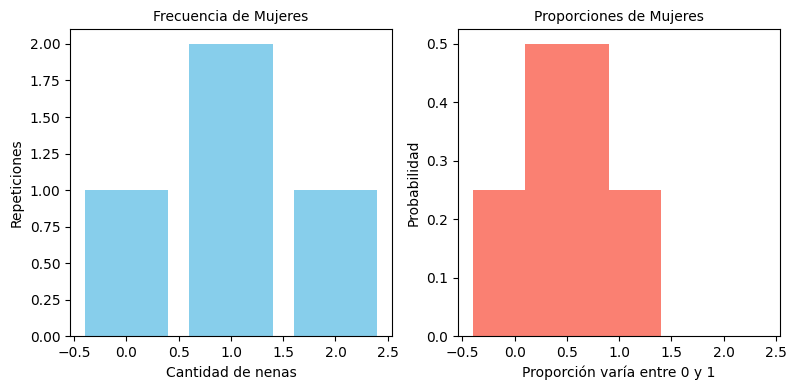

In [4]:

# b. Plotting the histograms
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

# First subplot for count
axes[0].bar(grouped_df['#nenas'], grouped_df['#rep'], color='skyblue')
axes[0].set_ylabel('Repeticiones')
axes[0].set_xlabel('Cantidad de nenas',fontsize=10)
axes[0].set_title('Frecuencia de Mujeres', fontsize=10)

# Second subplot for percentage
axes[1].bar(grouped_df['#nenas/t_nenas'], grouped_df['#nenas/samples'], color='salmon')
axes[1].set_ylabel('Probabilidad')
axes[1].set_xlabel('Proporción varía entre 0 y 1',fontsize=10)
axes[1].set_title('Proporciones de Mujeres', fontsize=10)

plt.tight_layout()
plt.show()


+ b. Frecuencias de Mujeres y probabiliddes de mujeres
+ El gráfico de frecuencias nos da las cantidades de mujeres que pueden encontrarse dentro de la muestra en el total de las muestras.
    + Si miramos la frecuencias vemos:
        + 1/4 veces se no se encontrarán ningun mujeres
        + 2/4 veces se encontrará 1 sola mujer
        + 1/4 veces se encontrarán 2 mujeres
        + Eje y: Repeticiones o cantidad de veces que se repita la cantidad de mujeres.
        + Eje x: Cantidad de mujeres que pueden encontrarse dentro de una muestra.
+ El grafico de proporciones nos da la probabilidad de encontrar una determinada proporción del total de mujeres dentro del total de las muestras.
    + Si obsevamos las probabilidades vemos:
        + 0.25 es la probabilidad de encontrar 0 de dos posibles mujeres dentro de las 4 muestras.
        + 0.5 es la probabilidad de encontrar 1 de dos mujeres posibles dentro de las 4 muestras.
        + 0.25 es la probabilidad de encontrar 2 de dos mujeres dentro posibles en las 4 muestras.
        + Eje y: La suma de las probabilidaddes da 1 como debe ser.
        + Eje x: La proporción de mujeres también varía entre 0 y 1 como debe ser.

+ C. ¿La media de la distribución muestral de la proporción de números mujeres también es igual a 1/2?
    + Calculamos la media
        + 1. sumaproducto de 0, 1 y 2 mujeres por la probabilidad de encontrar esas mujeres.
        + 2. dividimos la sumaproducto por la cantidad de muestras.
        + En este caso la media se ve a simple vista porque:
            + recordamos que la media de una distribución es : 𝜇=∑〖[𝑥 . 𝑃(𝑥)]〗
            + en este caso x='#odds/t_nenas' y P(x)='#odds/samples'
            + la sumaproducto dará  (0 * 0.25 + 0.5* 0.5 + 1* 0.25) = 0.5

In [5]:
print(grouped_df)
sumaproducto = (grouped_df['#nenas/t_nenas']* grouped_df['#nenas/samples'])
media_proporcion_de_mujeres=sumaproducto.sum()
print(f"El producto de la proporción de mujeres dentro de cada muestra por la probabilidad de obtener esa muestra es:\n{sumaproducto}-")
print(f"La media de la proporción de mujeres que aparecen en las muestras (#nenas/data) es igual a: {media_proporcion_de_mujeres}.")

   #nenas  #nenas/t_nenas  #nenas/data  #nenas/samples  #rep
0       0             0.0          0.0            0.25     1
1       1             0.5          0.5            0.50     2
2       2             1.0          1.0            0.25     1
El producto de la proporción de mujeres dentro de cada muestra por la probabilidad de obtener esa muestra es:
0    0.00
1    0.25
2    0.25
dtype: float64-
La media de la proporción de mujeres que aparecen en las muestras (#nenas/data) es igual a: 0.5.


#### Conclusiones
1. El la definición de este problema, al ver los datos ['h','m'] se observa que la proporción de mujeres es 0.5 o 1/2.
2. En el punto a, al armar la tabla de datos se observa que la media de las proporcones de mujeres sobre las muestras es 1/2.
2. En el punto c, se revisa la media de las proporciones y una vez mas se observa que la media de las proporciones es 0.5 o 1/2.
+ Por lo tanto, **las proporciones muestrales tienden a coincidir con la proporción poblacional** 
    + (en lugar de tender sistemáticamente a subestimar o sobreestimar ese valor)

_____________________________________________________________________________________________________________________________________________________________